In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [14]:
latent_dim = 32

class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
          layers.Flatten(),
          layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
          layers.Dense(784, activation='sigmoid'),
          layers.Reshape((28, 28))
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(latent_dim)

class Autoencoder_v2(Model):
    def __init__(self, latent_dim):
        super(Autoencoder_v2, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
          layers.Flatten(),
          layers.Dense(784, activation='relu'),
          layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
          layers.Dense(784, activation='relu'),
          layers.Dense(784, activation='sigmoid'),
          layers.Reshape((28, 28))
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(latent_dim)

In [15]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [5]:
x_train.shape

(60000, 28, 28)

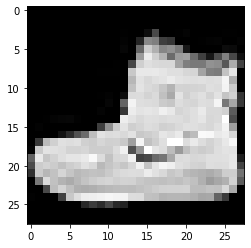

In [16]:
for i in range(1):
    plt.imshow(x_train[i])
    plt.show()

In [17]:
autoencoder.fit(x_train, x_train,epochs=10,shuffle=True,validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0453 - val_loss: 0.0166
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0156 - val_loss: 0.0141
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0138 - val_loss: 0.0134
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0132 - val_loss: 0.0131
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0131 - val_loss: 0.0129
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0129 - val_loss: 0.0129
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0128 - val_loss: 0.0129
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0127 - val_loss: 0.0128
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0126 - val_loss: 0.0127
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.012

In [20]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

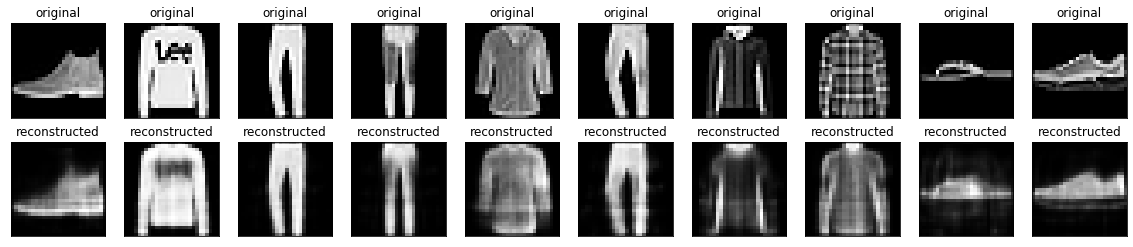

In [21]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

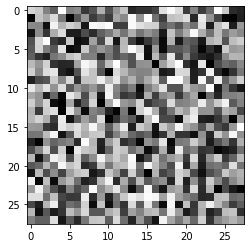

In [22]:
data = np.random.rand(28,28)
plt.imshow(data)

In [23]:
encoded_imgs = autoencoder.encoder(data.flatten().reshape(1,-1)).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

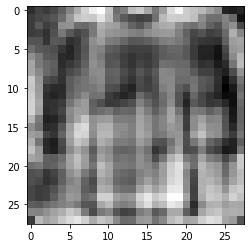

In [24]:
plt.imshow(decoded_imgs[0])